## Analysis of Helical Axis

* This tutorial discuss the analyses that can be performed using the [dnaMD Python module](http://do-x3dna.readthedocs.io/en/latest/api_summary.html) included in the _do\_x3dna_ package. The tutorial is prepared using [Jupyter Notebook](https://jupyter.org/) and this notebook tutorial file could be downloaded from this [link](http://rjdkmr.github.io/do_x3dna/tut_notebook/base_pairs_tutorial.ipynb).


* Download the input files that are used in the tutorial from this [link](http://rjdkmr.github.io/do_x3dna/tutorial_data.tar.gz).


* Two following input files are required in this tutorial
    * ``tutorial_data/elasticity/L-BPH_free_dna.dat``  (``do_x3dna`` output file of free DNA)
    * ``tutorial_data/elasticity/HelAxis_free_dna.dat``  (``do_x3dna`` output file of free DNA)
    * ``tutorial_data/elasticity/L-BPH_bound_DNA.dat`` (``do_x3dna`` output file of bound DNA)
    * ``tutorial_data/elasticity/HelAxis_bound_DNA.dat`` (``do_x3dna`` output file of bound DNA)
    
    These two file **should be** present inside tutorial_data/elasticity of the present working directory.
    
    
* The Python APIs **should be** only used when ``do_x3dna`` is executed with ``-ref`` option.


### Importing Python Modules

* [numpy](http://www.numpy.org/): Required for the calculations involving large arrays


* [matplotlib](http://matplotlib.org/): Required to plot the results


* [dnaMD](http://do-x3dna.readthedocs.io/en/latest/api_summary.html): Python module to analyze DNA/RNA structures from the do_x3dna output files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dnaMD
%matplotlib inline

### Initializing dnaMD.DNA object with HDF5 file

At first, we have to store helical base-steps parameters and global helcial axis to a HDF5 file from do_x3dna output file using dnaMD.DNA class.


In [2]:
freeDNA = dnaMD.DNA(27, filename='free_dna.h5')     # Initialize free DNA
boundDNA = dnaMD.DNA(27, filename='bound_dna.h5')    # Initialize complex/bound DNA

### Load data and save to file

At first, helical base-step parameters and local helical axis coordinate will be read from do_x3dna output files and stored in HDF5 (h5) file.


In [3]:
# Read helical base-step parameters
freeDNA.set_base_step_parameters('tutorial_data/elasticity/L-BPH_free_dna.dat', [1,26], helical=True)
boundDNA.set_base_step_parameters('tutorial_data/elasticity/L-BPH_bound_dna.dat', [1,26], helical=True)

# Read base-step parameters
freeDNA.set_base_step_parameters('tutorial_data/elasticity/L-BPS_free_dna.dat', [1,26], helical=False)
boundDNA.set_base_step_parameters('tutorial_data/elasticity/L-BPS_bound_dna.dat', [1,26], helical=False)

# Read local helical axis parameters
freeDNA.set_helical_axis('tutorial_data/elasticity/HelAxis_free_dna.dat')
boundDNA.set_helical_axis('tutorial_data/elasticity/HelAxis_bound_dna.dat')



Reading file : tutorial_data/elasticity/L-BPH_free_dna.dat
Reading frame 10000
Finished reading.... Total number of frame read =  11875

Reading file : tutorial_data/elasticity/L-BPH_bound_dna.dat
Reading frame 5000
Finished reading.... Total number of frame read =  5001

Reading file : tutorial_data/elasticity/L-BPS_free_dna.dat
Reading frame 10000
Finished reading.... Total number of frame read =  11875

Reading file : tutorial_data/elasticity/L-BPS_bound_dna.dat
Reading frame 5000
Finished reading.... Total number of frame read =  5001

Reading file : tutorial_data/elasticity/HelAxis_free_dna.dat
Reading frame 10000
Finished reading.... Total number of frame read =  11875

Reading file : tutorial_data/elasticity/HelAxis_bound_dna.dat
Reading frame 5000
Finished reading.... Total number of frame read =  5001


### Calculate global helical axis

To claculate bending angle, global helcial axis needs to be calculated as follows.

In [4]:
freeDNA.generate_smooth_axis(step=[2, 25], step_range=True, smooth=500.0, cut_off_angle=30, )
boundDNA.generate_smooth_axis(step=[2, 25], step_range=True, smooth=500.0, cut_off_angle=30)

freeDNA.calculate_curvature_tangent(step_range=True, step=[2,25], store_tangent=True)
boundDNA.calculate_curvature_tangent(step_range=True, step=[2,25], store_tangent=True)

|frame:      4023| WARNING: Bending angle [-1-0-1] = 35.31 is more than cut-off angle 30;
                     Four maximum distances between three adjacent axis positions = (41.9, 25.7, 25.0, 11.4);
                     Deleting [2, 3] original helical axis positions to remove possible fitting artifact...
|frame:      4024| WARNING: Bending angle [2-3-4] = 99.87 is more than cut-off angle 30;
                     Four maximum distances between three adjacent axis positions = (72.4, 44.5, 40.2, 13.1);
                     Deleting [2, 3] original helical axis positions to remove possible fitting artifact...


/home/raku0018/workspace/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2592: RuntimeWarning: Mean of empty slice.
  xsmooth.append(xnew[start:end].mean())
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/raku0018/workspace/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2593: RuntimeWarning: Mean of empty slice.
  ysmooth.append(ynew[start:end].mean())
/home/raku0018/workspace/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2594: RuntimeWarning: Mean of empty slice.
  zsmooth.append(znew[start:end].mean())


|frame:      5619| WARNING: Bending angle [-1-0-1] = 50.09 is more than cut-off angle 30;
                     Four maximum distances between three adjacent axis positions = (65.7, 40.1, 35.6, 11.5);
                     Deleting [8, 7] original helical axis positions to remove possible fitting artifact...
Fitting spline curve on helical axis of frame 11000 out of 11875 frames
Finished spline curve fitting...
Fitting spline curve on helical axis of frame 5000 out of 5001 frames
Finished spline curve fitting...


### Close free_dna.h5 file

Now, we do not need free_dna.h5 file through freeDNA object for calculation. Therefore, we can close free_dna.h5 by deleting freeDNA object.

boundDNA object will be later use to calculate deformation free energy of bound DNA.

In [5]:
del freeDNA

### Initializing eyDNA object with free_dna.h5 file

* [eyDNA object](http://do-x3dna.readthedocs.io/en/latest/dna_class_api.html#dnaMD.dnaEY.eyDNA) is initialized by using the total number of base-pairs and HDF5 file.

* This class contains all the required functions to calculate the elastic properties and deformation free energy.

In [6]:
eyDNA = dnaMD.dnaEY(27, 'BST', filename='free_dna.h5')

### Determining modulus matrix - bending, stretching and twisting

Modulus matrix for all three major motions (bending, stretching and twisting) can be obtained with getStrecthTwistBend method.

In the following example, matrix is calculated for all frames and first 5000 frames, respectively.


In [7]:
# All frames
avg, mod_matrix = eyDNA.getStretchTwistBendModulus([4,24], paxis='X')
print('Average values for all frames: ', avg)
print('Modulus matrix for all frames: \n', mod_matrix )
print(' ')

# Elastic matrix
avg, mod_matrix = eyDNA.getStretchTwistBendModulus([4,24], paxis='X', matrix=True)
print('Average values for all frames: ', avg)
print('Elastic constant matrix for all frames: \n', mod_matrix )
print(' ')

Average values for all frames:  [  0.0714391    0.19807279   6.6266403   11.74782034]
Modulus matrix for all frames: 
 [[  2.63187198e+02  -3.57225095e+00  -1.29891912e+01  -1.23519220e+01]
 [ -3.57225095e+00   2.12663132e+02   2.00459777e+01  -1.28910750e-01]
 [ -1.29891912e+01   2.00459777e+01   9.13888461e+02  -1.21773143e+02]
 [ -1.23519220e+01  -1.28910750e-01  -1.21773143e+02   3.59007486e+02]]
 
Average values for all frames:  [  0.0714391    0.19807279   6.6266403   11.74782034]
Elastic constant matrix for all frames: 
 [[  9.58885803e+00  -1.30149975e-01  -4.73243041e-01  -4.50025030e-01]
 [ -1.30149975e-01   7.74808422e+00   7.30347204e-01  -4.69668315e-03]
 [ -4.73243041e-01   7.30347204e-01   3.32962499e+01  -4.43663443e+00]
 [ -4.50025030e-01  -4.69668315e-03  -4.43663443e+00   1.30799364e+01]]
 


The elastic matrix is in this form:

$$\text{Elastic matrix} = \begin{bmatrix}
    K_{Bx}       & K_{Bx,By} & K_{Bx,S} & K_{Bx,T} \\
    K_{Bx,By}    & K_{By}    & K_{By,S} & K_{By,T} \\
    K_{Bx,S}     & K_{By,S}  & K_{S}    & K_{S,T} \\
    K_{Bx,T}     & K_{Bx,T}  & K_{S,T}  & K_{T}
\end{bmatrix}
$$

Where: 
* $Bx$ - Bending motion in one plane
* $By$ - Bending motion in another orthogonal plane
* $S$ - Stretching motion
* $T$ - Twisting motion


$$\text{modulus matrix} =
\begin{bmatrix}
M_{Bx}       & M_{Bx,By} & M_{Bx,S} & M_{Bx,T} \\
M_{Bx,By}    & M_{By}    & M_{By,S} & M_{By,T} \\
M_{Bx,S}     & M_{By,S}  & M_{S}    & M_{S,T} \\
M_{Bx,T}     & M_{Bx,T}  & M_{S,T}  & M_{T}
\end{bmatrix}
= 4.1419464 \times \begin{bmatrix}
K_{Bx}       & K_{Bx,By} & K_{Bx,S} & K_{Bx,T} \\
K_{Bx,By}    & K_{By}    & K_{By,S} & K_{By,T} \\
K_{Bx,S}     & K_{By,S}  & K_{S}    & K_{S,T} \\
K_{Bx,T}     & K_{Bx,T}  & K_{S,T}  & K_{T}
\end{bmatrix} \times L_0
$$

Where: 
* $M_{Bx}$ - Bending-1 stiffness in one plane
* $M_{By}$ - Bending-2 stiffness in another orthogonal plane
* $M_{S}$ - Stretch Modulus
* $M_{T}$ - Twist rigidity
* $M_{Bx,By}$ - Bending-1 and Bending-2 coupling
* $M_{By,S}$ - Bending-2 and stretching coupling
* $M_{S,T}$ - Stretching Twsiting coupling
* $M_{Bx,S}$ - Bending-1 Stretching coupling
* $M_{By,T}$ - Bending-2 Twisting coupling
* $M_{Bx,T}$ - Bending-1 Twisting coupling


### Convergence in bending, stretching and twisting with their couplings

Elasticities cannot be calcualted from an individual snapshot or frame. However, these properties can be calculated as a function of time by considering all the frames up to that time. For example, 0-50 ns, 0-100 ns, 0-150 ns etc. By this method, we can analyze the convergence and also further we can calculate error using block average method.

Elasticities over the time can be calculated using getElasticityByTime method.

If **esType=```'BST'``**, 2D array with all 10 properties of shape (10, frame) will be returned.
1. $M_{Bx}$ - Bending-1 stiffness in one plane
2. $M_{By}$ - Bending-2 stiffness in another orthogonal plane
3. $M_{S}$ - Stretch Modulus
4. $M_{T}$ - Twist rigidity
5. $M_{Bx,By}$ - Bending-1 and Bending-2 coupling
6. $M_{By,S}$ - Bending-2 and stretching coupling
7. $M_{S,T}$ - Stretching Twsiting coupling
8. $M_{Bx,S}$ - Bending-1 Stretching coupling
9. $M_{By,T}$ - Bending-2 Twisting coupling
10. $M_{Bx,T}$ - Bending-1 Twisting coupling

If **esType=```'ST'``**, 2D array with three properties of shape (3, frame) will be returned.
1. $M_{S}$ - Stretch Modulus
2. $M_{T}$ - Twist rigidity
3. $M_{S,T}$ - Stretching Twsiting coupling

In the following example, modulus as a function of time was calculated by adding 1000 frames.

/home/raku0018/workspace/github/do_x3dna/dnaMD/dnaMD/dnaMD.py:2521: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arccos(dot_x_y / (np.sqrt(dot_x_x) * np.sqrt(dot_y_y)))


Shape of modulus Array: (10, 23)


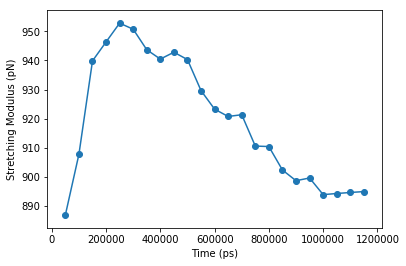

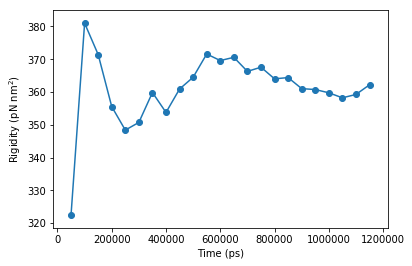

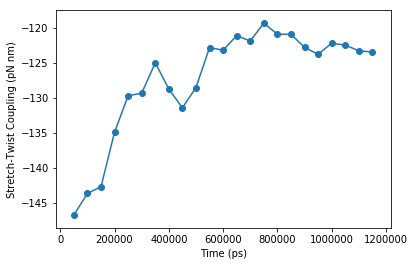

In [8]:
time, modulus = eyDNA.getModulusByTime([4,22], 500, masked=True)
print('Shape of modulus Array:', modulus.shape)

# Stretching modulus
plt.plot(time, modulus[2])
plt.scatter(time, modulus[2])
plt.xlabel('Time (ps)')
plt.ylabel(r'Stretching Modulus (pN)')
plt.show()

# Twist rigidity
plt.plot(time, modulus[3])
plt.scatter(time, modulus[3])
plt.xlabel('Time (ps)')
plt.ylabel(r'Rigidity (pN nm$^2$)')
plt.show()

# Stretch twist coupling
plt.plot(time, modulus[6])
plt.scatter(time, modulus[6])
plt.xlabel('Time (ps)')
plt.ylabel(r'Stretch-Twist Coupling (pN nm)',)
plt.show()

### Deformation free energy of bound DNA

Deformation free energy can be calculated for the following motions that can be used with ``which`` option.

* ``'all'`` : Use entire elastic matrix -- all motions with their coupling
* ``'diag'`` : Use diagonal of elastic matrix -- all motions but no coupling
* ``'b1'`` : Only bending-1 motion
* ``'b2'`` : Only bending-2 motion
* ``'stretch'`` : Only stretching motion
* ``'twist'`` : Only Twisting motions
* ``'st_coupling'`` : Only stretch-twist coupling motion
* ``'bs_coupling'`` : Only Bending and stretching coupling
* ``'bt_coupling'`` : Only Bending and Twisting coupling
* ``'bb_coupling'`` : Only bending-1 and bending-2 coupling
* ``'bend'`` : Both bending motions with their coupling
* ``'st'`` : Stretching and twisting motions with their coupling
* ``'bs'`` : Bending (b1, b2) and stretching motions with their coupling
* ``'bt'`` : Bending (b1, b2) and twisting motions with their coupling


Average deformation energy of Bound DNA using entire elastic matrix:  17.035243789
Average deformation energy of Bound DNA using only diagonal of elastic matrix:  18.8910067615


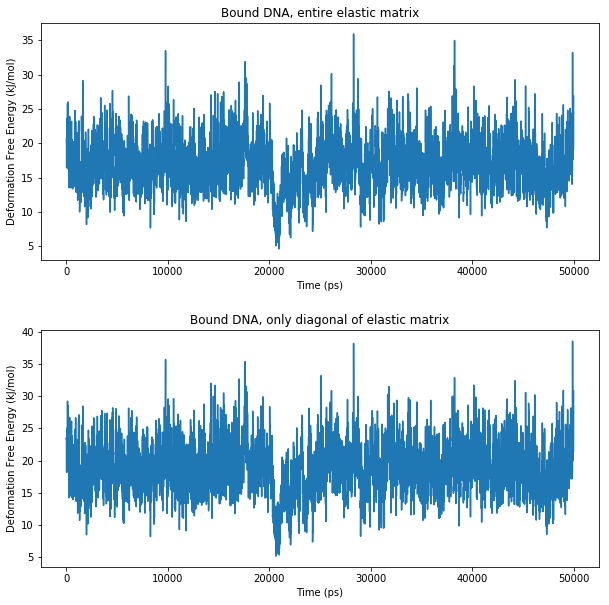

In [9]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.3)

# Deformation free energy of bound DNA by considering whole elastic matrix
time, energy = eyDNA.getGlobalDeformationEnergy([5,22], boundDNA, paxis='X', which='all', masked=True)
print('Average deformation energy of Bound DNA using entire elastic matrix: ', np.mean(energy))

ax1 = fig.add_subplot(211)
ax1.set_title('Bound DNA, entire elastic matrix')

ax1.plot(time, energy)
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel(r'Deformation Free Energy (kJ/mol)',)


# Deformation free energy of bound DNA by considering diagonal of elastic matrix
time, energy = eyDNA.getGlobalDeformationEnergy([5,22], boundDNA, paxis='X', which='diag', masked=True)
print('Average deformation energy of Bound DNA using only diagonal of elastic matrix: ', np.mean(energy))

ax2 = fig.add_subplot(212)
ax2.set_title('Bound DNA, only diagonal of elastic matrix')

ax2.plot(time, energy)
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel(r'Deformation Free Energy (kJ/mol)',)

plt.show()

### Local elastic properties or stiffness

Local elastic properties can be caluclated using either local base-step parameters or local helical base-step parameters.

In case of **base-step** parameters: Shift ($Dx$), Slide ($Dy$), Rise ($Dz$), Tilt ($\tau$), Roll ($\rho$) and Twist ($\omega$), following elastic matrix is calculated.

$$
\mathbf{K}_{base-step} = \begin{bmatrix}
K_{Dx}        & K_{Dx,Dy}      & K_{Dx,Dz}      & K_{Dx,\tau}      & K_{Dx,\rho}      & K_{Dx,\omega} \\
K_{Dx,Dy}     & K_{Dy}         & K_{Dy,Dz}      & K_{Dy,\tau}      & K_{Dy,\rho}      & K_{Dy,\omega} \\
K_{Dx,Dz}     & K_{Dy,Dz}      & K_{Dz}         & K_{Dz,\tau}      & K_{Dz,\rho}      & K_{Dz,\omega} \\
K_{Dx,\tau}   & K_{Dy,\tau}    & K_{Dz,\tau}    & K_{\tau}         & K_{\tau, \rho}   & K_{\tau,\omega} \\
K_{Dx,\rho}   & K_{Dy,\rho}    & K_{Dz,\rho}    & K_{\tau, \rho}   & K_{\rho}         & K_{\rho,\omega} \\
K_{Dx,\omega} & K_{Dy,\omega}  & K_{Dz,\omega}  & K_{\tau, \omega} & K_{\rho, \omega} & K_{\omega} \\
\end{bmatrix}
$$

In case of **helical-base-step** parameters: x-displacement ($dx$), y-displacement ($dy$), h-rise ($h$), inclination ($\eta$), tip ($\theta$) and twist ($\Omega$), following elastic matrix is calculated.

$$
\mathbf{K}_{helical-base-step} = \begin{bmatrix}
K_{dx}        & K_{dx,dy}      & K_{dx,h}      & K_{dx,\eta}      & K_{dx,\theta}      & K_{dx,\Omega} \\
K_{dx,dy}     & K_{dy}         & K_{dy,h}      & K_{dy,\eta}      & K_{dy,\theta}      & K_{dy,\Omega} \\
K_{dx,h}      & K_{dy,h}       & K_{h}         & K_{h,\eta}       & K_{h,\theta}       & K_{h,\Omega} \\
K_{dx,\eta}   & K_{dy,\eta}    & K_{h,\eta}    & K_{\eta}         & K_{\eta, \theta}   & K_{\eta,\Omega} \\
K_{dx,\theta} & K_{dy,\theta}  & K_{h,\theta}  & K_{\eta, \theta} & K_{\theta}         & K_{\theta,\Omega} \\
K_{dx,\Omega} & K_{dy,\Omega}  & K_{h,\Omega}  & K_{\eta, \Omega} & K_{\theta, \Omega} & K_{\Omega} \\
\end{bmatrix}
$$


In [10]:
# base-step
avg, matrix = eyDNA.calculateLocalElasticity([10,12], helical=False)
print('Average values for all frames: ', avg)
print('Elastic matrix for all frames: \n', matrix )
print(' ')

# helical base-step
avg, matrix = eyDNA.calculateLocalElasticity([10,12], helical=True)
print('Average values for all frames: ', avg)
print('Elastic matrix for all frames: \n', np.round(matrix,4) )
print(' ')


Average values for all frames:  [  2.03031579e-02  -2.42026274e-01   1.00771259e+00  -1.71171874e+00
   1.82815907e+01   9.32263764e+01]
Elastic matrix for all frames: 
 [[  1.84018348e+02  -4.41365544e+00  -2.23600166e+00  -7.41691531e-01
    5.05738503e-02   4.51710270e-01]
 [ -4.41365544e+00   1.27539581e+02   5.86198813e+01   2.36165413e-01
   -4.26871844e-01  -1.87166268e+00]
 [ -2.23600166e+00   5.86198813e+01   5.88543417e+02  -5.63357477e-02
   -3.57761607e-01  -4.27404054e-01]
 [ -7.41691531e-01   2.36165413e-01  -5.63357477e-02   3.70236047e-02
    1.00930436e-03  -5.15227895e-03]
 [  5.05738503e-02  -4.26871844e-01  -3.57761607e-01   1.00930436e-03
    1.45539175e-02   1.38641163e-02]
 [  4.51710270e-01  -1.87166268e+00  -4.27404054e-01  -5.15227895e-03
    1.38641163e-02   6.30449411e-02]]
 
Average values for all frames:  [ -7.78745684e-01  -6.28421895e-02   9.20510400e-01   3.35174223e+01
   2.97683453e+00   9.79653061e+01]
Elastic matrix for all frames: 
 [[  3.76608000e

### Local deformation energy
Using the above elastic matrix, deformation energy of each base-step in bound DNA can be calucalted.

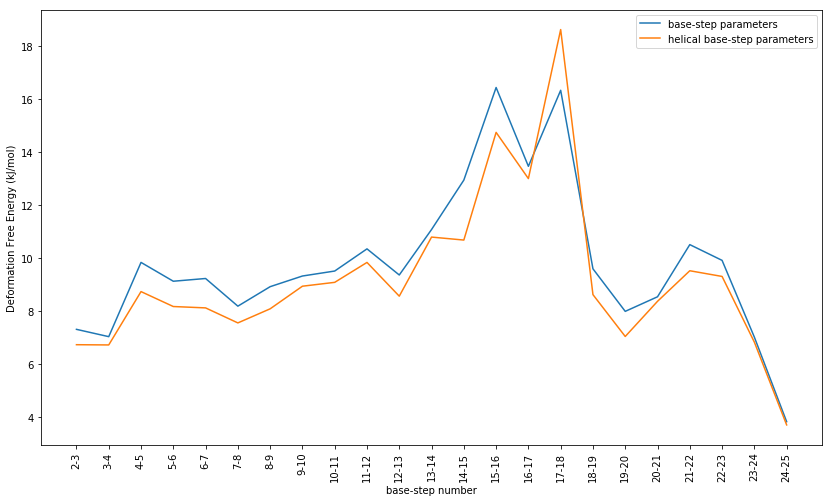

In [11]:
bps = []
bp_energy = []
bph_energy = []

# Here calculate energy for each base-step and average iit over time
for bp in range(2, 25):
    time, en = eyDNA.getLocalDeformationEnergy([bp, bp+1], boundDNA, helical=False, unit='kJ/mol', which='all')
    bp_energy.append(np.mean(en))
    
    time, en = eyDNA.getLocalDeformationEnergy([bp, bp+1], boundDNA, helical=True, unit='kJ/mol', which='all')
    bph_energy.append(np.mean(en))
    
    bps.append('{0}-{1}'.format(bp, bp+1))
    
    
xticks = range(len(bps))

# Now plot the data
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(111)

ax1.plot(xticks, bp_energy, label='base-step parameters')
ax1.plot(xticks, bph_energy, label='helical base-step parameters')

ax1.set_xticks(xticks)
ax1.set_xticklabels(bps, rotation='vertical')

ax1.set_xlabel('base-step number')
ax1.set_ylabel(r'Deformation Free Energy (kJ/mol)',)

plt.legend()

plt.show()